
# ✅ Summary: Music / Song Clustering

**Objective:**
To group songs into clusters based on their acoustic features (danceability, energy, tempo, etc.) without predefined labels, helping in playlist generation and recommendation systems.

**Dataset:**

* Spotify Tracks Dataset (Kaggle) with **160k+ songs**.
* Features like **danceability, energy, acousticness, tempo** were used.

**Techniques Used:**

* **StandardScaler** → Feature normalization.
* **K-Means Clustering** → Grouped songs into 5 clusters.
* **Elbow Method** → Identified optimal cluster count.
* **PCA** → Reduced dimensions for visualization.
* **Hierarchical Clustering (Ward’s method)** → Validated grouping with dendrogram.

**Results:**

* Clusters revealed **different moods/genres** (e.g., energetic dance tracks, calm acoustic songs, instrumental tracks).
* Heatmap analysis showed **feature importance per cluster**.
* PCA visualization confirmed meaningful separation of clusters.

**Real-World Impact:**

* Enables **automatic playlist generation** (e.g., “Chill Vibes”, “Workout Mix”).
* Helps in **personalized recommendation** for streaming platforms.
* Can be extended to mood-based classification for smart assistants, radio apps, and music discovery.

**Key Points:**

* Scaling features is critical for clustering audio data.
* K-Means is fast and effective, while Hierarchical Clustering provides deeper insights.
* PCA makes high-dimensional acoustic data interpretable.


### Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Warnings
import warnings
warnings.filterwarnings("ignore")


### Step 2: Load Dataset


In [2]:
# Kaggle dataset: "Spotify Tracks Dataset"
# https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

df = pd.read_csv("Data/SpotifyFeatures.csv")

print("Shape:", df.shape)
df.head()


Shape: (232725, 18)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Step 3: Data Preprocessing


In [3]:
# Select relevant numeric features only
features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence'
]

# Extract numeric features
X = df[features]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature shape:", X_scaled.shape)


Scaled feature shape: (232725, 10)


### Step 4: K-Means Clustering


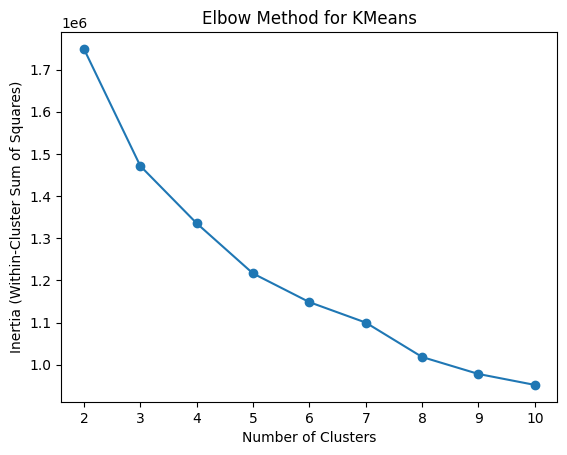

In [ ]:
# Find optimal clusters with Elbow method
inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for KMeans")
plt.show()


### Step 5: Apply KMeans


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

df[["track_name", "artist_name", "genre", "KMeans_Cluster"]].head(10)
#df.head()


,track_name,artist_name,genre,KMeans_Cluster
0,C'est beau de faire un Show,Henri Salvador,Movie,0
1,Perdu d'avance (par Gad Elmaleh),Martin & les fées,Movie,0
2,Don't Let Me Be Lonely Tonight,Joseph Williams,Movie,1
3,Dis-moi Monsieur Gordon Cooper,Henri Salvador,Movie,1
4,Ouverture,Fabien Nataf,Movie,1
5,Le petit souper aux chandelles,Henri Salvador,Movie,1
6,"Premières recherches (par Paul Ventimila, Lori...",Martin & les fées,Movie,2
7,Let Me Let Go,Laura Mayne,Movie,1
8,Helka,Chorus,Movie,4
9,Les bisous des bisounours,Le Club des Juniors,Movie,4


### Step 6: PCA for Visualization


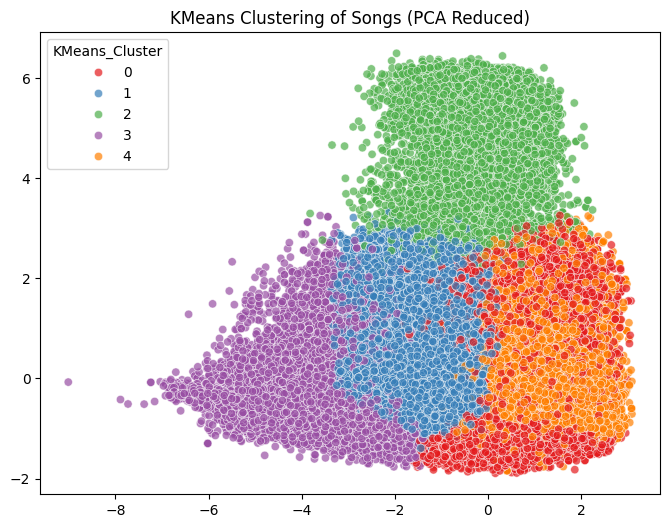

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df["KMeans_Cluster"], palette="Set1",
    alpha=0.7
)
plt.title("KMeans Clustering of Songs (PCA Reduced)")
plt.show()


### Step 7: Hierarchical Clustering


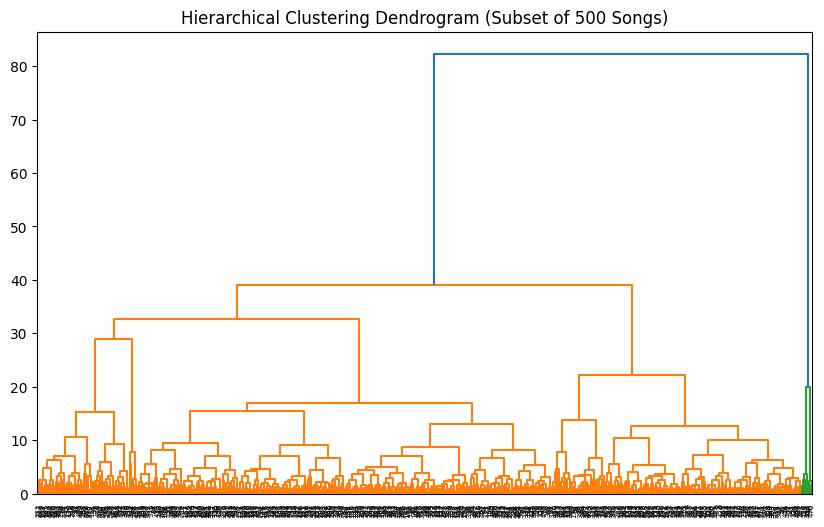

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Dendrogram on Sample
X_sample = X_scaled[:500]  # use only first 500 for hierarchical demo

linked = linkage(X_sample, method="ward")

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Subset of 500 Songs)")
plt.show()

#Agglomerative on Sample
agg = AgglomerativeClustering(n_clusters=5)
sample_labels = agg.fit_predict(X_sample)

# Assign clusters back to sample dataframe (not full df)
df_sample = df.iloc[:500].copy()
df_sample["Hier_Cluster"] = sample_labels
#print(df_sample[["track_name", "artist_name", "genre", "Hier_Cluster"]].head(10))

# KMeans on Full Dataset
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1024)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)

In [8]:
df["track_name"] = df["track_name"].str.slice(0, 40) + "..."
print(df[["track_name", "artist_name", "genre", "KMeans_Cluster"]].head(10).to_string())


                                    track_name          artist_name  genre  KMeans_Cluster
0               C'est beau de faire un Show...       Henri Salvador  Movie               2
1          Perdu d'avance (par Gad Elmaleh)...    Martin & les fées  Movie               0
2            Don't Let Me Be Lonely Tonight...      Joseph Williams  Movie               1
3            Dis-moi Monsieur Gordon Cooper...       Henri Salvador  Movie               1
4                                 Ouverture...         Fabien Nataf  Movie               1
5            Le petit souper aux chandelles...       Henri Salvador  Movie               1
6  Premières recherches (par Paul Ventimila...    Martin & les fées  Movie               4
7                             Let Me Let Go...          Laura Mayne  Movie               1
8                                     Helka...               Chorus  Movie               0
9                 Les bisous des bisounours...  Le Club des Juniors  Movie               0

### Step 8: Cluster Analysis


                acousticness  danceability    duration_ms    energy  \
KMeans_Cluster                                                        
0                   0.284085      0.723396  215652.505588  0.624491   
1                   0.770159      0.452393  232617.945567  0.278629   
2                   0.107078      0.546977  240282.030904  0.739721   
3                   0.818668      0.306044  263711.706024  0.185714   
4                   0.783127      0.562120  244806.268319  0.664135   

                instrumentalness  liveness   loudness  speechiness  \
KMeans_Cluster                                                       
0                       0.070281  0.164537  -7.843778     0.105844   
1                       0.047086  0.185877 -13.515967     0.059476   
2                       0.075239  0.224024  -6.083853     0.094086   
3                       0.820060  0.141767 -20.348355     0.045425   
4                       0.001403  0.729343 -11.920410     0.869785   

           

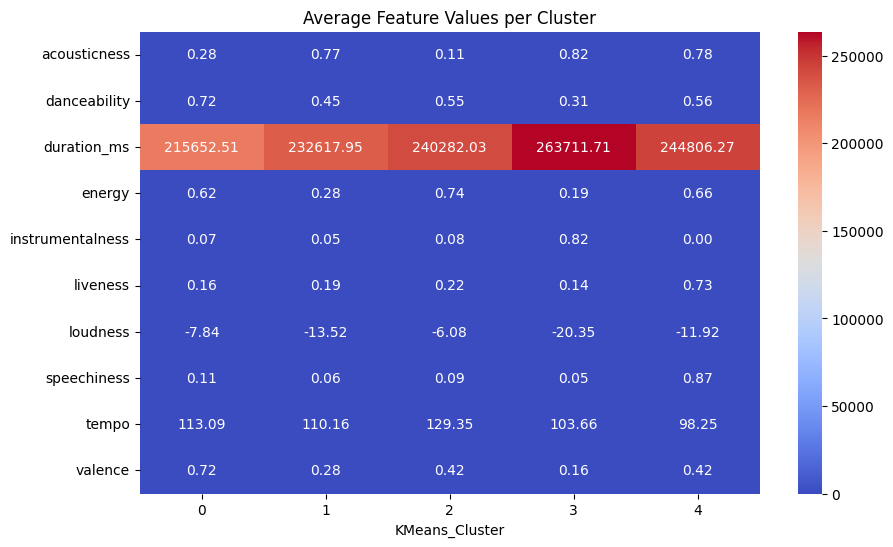

In [9]:
cluster_summary = df.groupby("KMeans_Cluster")[features].mean()
print(cluster_summary)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Average Feature Values per Cluster")
plt.show()
